In [38]:
import torch
import torchvision
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

In [39]:
# how many samples per batch to load
batch_size = 32
# percentage of training set to use as validation
test_size = 0.3
valid_size = 0.1

# convert data to a normalized torch.FloatTensor
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [40]:
data = datasets.ImageFolder('face',transform=transform)

In [41]:
#For test
num_data = len(data)
indices_data = list(range(num_data))
np.random.shuffle(indices_data)
split_tt = int(np.floor(test_size * num_data))
train_idx, test_idx = indices_data[split_tt:], indices_data[:split_tt]

#For Valid
num_train = len(train_idx)
indices_train = list(range(num_train))
np.random.shuffle(indices_train)
split_tv = int(np.floor(valid_size * num_train))
train_new_idx, valid_idx = indices_train[split_tv:],indices_train[:split_tv]


# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_new_idx)
test_sampler = SubsetRandomSampler(test_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

In [42]:
train_loader = torch.utils.data.DataLoader(data, batch_size=batch_size,
    sampler=train_sampler, num_workers=1)
valid_loader = torch.utils.data.DataLoader(data, batch_size=batch_size, 
    sampler=valid_sampler, num_workers=1)
test_loader = torch.utils.data.DataLoader(data, sampler = test_sampler, batch_size=batch_size, 
    num_workers=1)
classes = ('Elias','Eyvind','Karen','Luis', 'Maria','Alfred','Andre','Anibal')

In [43]:
len(test_loader)*batch_size + len(valid_loader)*batch_size + len(train_loader)*batch_size

1408

In [44]:
for batch in valid_loader:
    print(batch[0].size())

torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])
torch.Size([32, 3, 224, 224])


Karen Elias Alfred Andre Karen Maria Elias Elias Eyvind Elias Karen  Luis Maria Eyvind Eyvind Elias Maria Elias Elias Elias  Luis Andre Elias Andre Elias Elias Alfred Andre Andre Karen Andre Elias


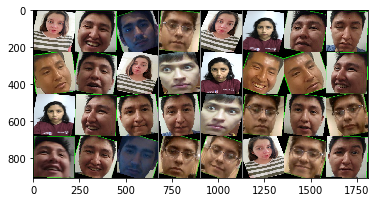

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image
    
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(32)))


In [46]:
import torch.nn as nn
import torch.nn.functional as F
# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 32, 5)
        self.fc1 = nn.Linear(32*53*53, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 8)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 32*53*53)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()


In [47]:
import torch.optim as optim

# especifica la funcion perdida
criterion = torch.nn.CrossEntropyLoss()

# especifica el optimizador
optimizer = torch.optim.SGD(net.parameters(), lr = 0.003, momentum= 0.9)

In [48]:
# numero de ephocs para entrenar
n_epochs = 20 

valid_loss_min = np.Inf # tracker

for epoch in range(1, n_epochs+1):

    train_loss = 0.0
    valid_loss = 0.0
    
    # Entrenando el modelo #
    
    net.train()
    for data, target in train_loader:
    
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = net(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
            
    # validando el modelo #
    net.eval()
    for data, target in valid_loader:
        # forward pass: 
        output = net(data)
        # calcular la perdida batch
        loss = criterion(output, target)
        # actuaizar average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len(train_loader.dataset)
    valid_loss = valid_loss/len(valid_loader.dataset)
        
    # imprimir training/validacion 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))

Epoch: 1 	Training Loss: 1.126724 	Validation Loss: 0.074525
Epoch: 2 	Training Loss: 0.347441 	Validation Loss: 0.023883
Epoch: 3 	Training Loss: 0.130490 	Validation Loss: 0.010199
Epoch: 4 	Training Loss: 0.068673 	Validation Loss: 0.007924
Epoch: 5 	Training Loss: 0.023847 	Validation Loss: 0.001477
Epoch: 6 	Training Loss: 0.015985 	Validation Loss: 0.003294
Epoch: 7 	Training Loss: 0.010339 	Validation Loss: 0.004147
Epoch: 8 	Training Loss: 0.021371 	Validation Loss: 0.001098
Epoch: 9 	Training Loss: 0.008189 	Validation Loss: 0.002176
Epoch: 10 	Training Loss: 0.005073 	Validation Loss: 0.003511
Epoch: 11 	Training Loss: 0.001221 	Validation Loss: 0.001568
Epoch: 12 	Training Loss: 0.001881 	Validation Loss: 0.002138
Epoch: 13 	Training Loss: 0.001194 	Validation Loss: 0.001571
Epoch: 14 	Training Loss: 0.002625 	Validation Loss: 0.001372
Epoch: 15 	Training Loss: 0.002290 	Validation Loss: 0.001902
Epoch: 16 	Training Loss: 0.002872 	Validation Loss: 0.000911
Epoch: 17 	Traini

GroundTruth:  Anibal Eyvind Anibal Elias Alfred Alfred Andre Elias Eyvind  Luis Anibal Andre Andre Andre Eyvind Karen Andre Elias Anibal Karen Elias Anibal Karen Eyvind Andre Andre Karen Anibal Maria Andre Alfred Andre


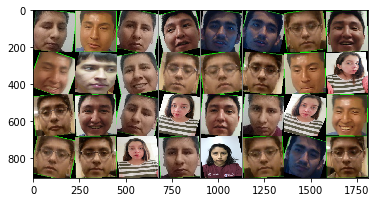

In [49]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(32)))

In [50]:
outputs = net(images)

In [51]:
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(32)))

Predicted:  Elias Eyvind Elias Elias Alfred Alfred Andre Elias Eyvind  Luis Elias Andre Andre Andre Eyvind Karen Andre Elias Elias Karen Elias Elias Karen Eyvind Andre Andre Karen Elias Maria Andre Alfred Andre


In [56]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(8))
class_total = list(0. for i in range(8))

net.eval()
i=1

len(test_loader)
for data, target in test_loader:
    i=i+1
    if len(target)!=batch_size:
        continue
        
    # forward pass: 
    output = net(data)
    # calcular la perdida batch 
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    
    _, pred = torch.max(output, 1)    
    
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy())
    
    for i in range(batch_size):       
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(7):
    if class_total[i] > 0:
        print('Test de %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('no hay')




Test Loss: 0.767721

Test de Elias: 98% (60/61)
Test de Eyvind: 100% (33/33)
Test de Karen: 100% (40/40)
Test de  Luis: 100% (29/29)
Test de Maria: 100% (33/33)
Test de Alfred: 100% (32/32)
Test de Andre: 98% (84/85)
